In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

*** No CODEPAGE record, no encoding_override: will use 'ascii'
12.692857142857141 33.666666666666664


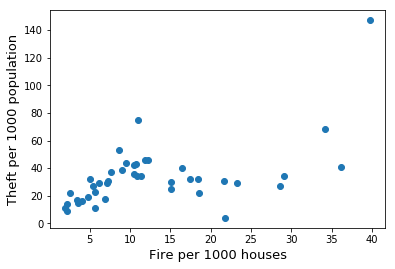

In [2]:
# Loding Dataset
_location_=os.path.dirname(os.path.realpath('_file_'))
filepath=os.path.join(_location_,'fire_theft.xls')
df=pd.read_excel(filepath)
# x=fires/1000 house
# y=theft/1000 population
x, y=np.array(df['X']), np.array(df['Y'])
x.resize(len(x),1)
y.resize(len(y),1)
plt.scatter(x,y)
print(np.mean(x),np.mean(y))
plt.xlabel('Fire per 1000 houses',fontsize=13)
plt.ylabel('Theft per 1000 population',fontsize=13)
plt.show()

In [3]:
def cost(x,y,theta=[0,0]):
    m=len(y)    # total number of training examples
    squared_error=0.0
    for i in range(m):
        squared_error += ((theta[0]+theta[1]*x[i])-y[i])**2
    J=squared_error/(2*m)    # cost
    return J

In [4]:
def gradient_descent(x,y,theta=[0,0],learning_rate=0.001,iterations=1500):
    m=len(y)    # total number of training examples
    X=np.column_stack((np.ones((m,1)),x))    # X=[1 x1; 2 x2; ...;m xm]
    J=[]
    theta=np.matrix(theta,dtype=float).T
    
    for i in range(iterations):
        hx=np.array(X@theta)
        error=np.array(hx-y)
        theta[0][0]=theta[0][0]-learning_rate*(np.sum(error)/m)
        theta[1][0]=theta[1][0]-learning_rate*(np.sum(error*x)/m)
        t=theta.tolist()
        J.append(cost(x,y,[t[0][0],t[1][0]]))
        
    theta=theta.tolist()
    plt.plot([x for x in range(iterations)],J)
    plt.xlabel('Number of iterations',fontsize=13)
    plt.ylabel('J(theta)',fontsize=13)
    plt.show()
    return [theta[0][0], theta[1][0]]

In [ ]:
theta=gradient_descent(x,y,iterations=20000)    # calculating values of the parameters
print('Value of parametrs=',theta)
print('Cost=',cost(x,y,theta))    # cost of the hypothesis
X=np.column_stack((np.ones((len(x),1)),x))
theta=np.matrix(theta,dtype=float).T
hx=np.array(X@theta)
plt.scatter(x,y)
plt.scatter(np.mean(x),np.mean(y))
plt.plot(x,hx,'g')
plt.legend(['hypothesis function','dataset','mean of dataset'])
plt.xlabel('Fire per 1000 houses',fontsize=13)
plt.ylabel('Theft per 1000 population',fontsize=13)
plt.show()

In [ ]:
theta=theta.tolist()
theta=[theta[0][0], theta[1][0]]
# now if x=50
y_prediction=theta[0]+theta[1]*50;
print('When x=50 then predicted value=',y_prediction)